In [1]:
cd ..

/mnt/c/Users/macle/Dropbox/mcode/SerpentAI


In [2]:
from plugins.SerpentMiniMetroGamePlugin.files.api.object_detector.pytorch_detector import PytorchObjectDetector
import skimage.io
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
model_path = 'ml_train/station_detector/pytorch/yolov3_ckpt_14.pth'
config_path = 'ml_train/station_detector/pytorch/models/m0/yolov3-custom.cfg'
labels_path = None
img_size = 416
conf_threshold = 0.6
nms_threshold = 0.1

In [4]:
station_detector = PytorchObjectDetector(model_path, config_path, labels_path, img_size)

### Running inference and plotting results on 'test' images

In [5]:
img_paths = list(Path("ml_train/station_detector/pytorch/data/test").glob("*.png"))
img_filenames = [img_path.name for img_path in img_paths]

In [15]:
%%time
images = [skimage.io.imread(img_path) for img_path in img_paths[:2]]

detection_results = [station_detector.predict(image, conf_threshold, nms_threshold) for image in images] 

CPU times: user 3.61 s, sys: 156 ms, total: 3.77 s
Wall time: 1.91 s


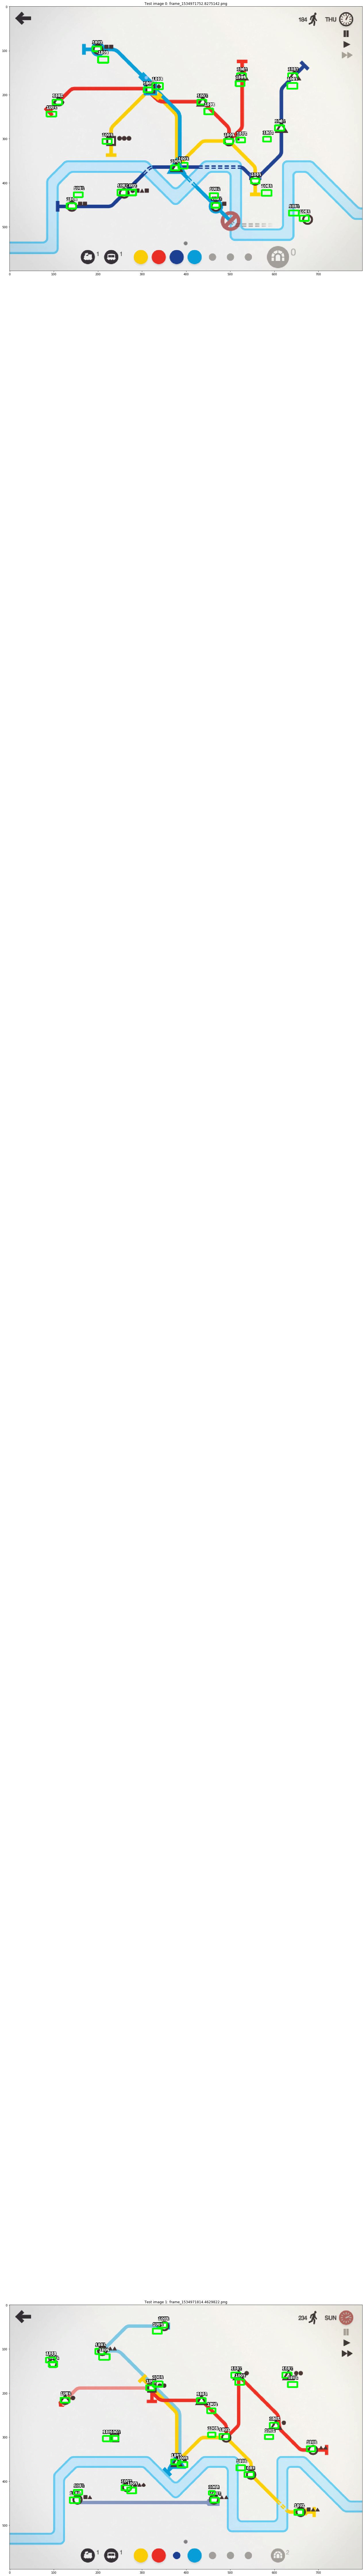

In [16]:
_, axes = plt.subplots(nrows=len(detection_results), ncols=1, figsize=(22,270))

for i, (image, img_filename, detection_result, ax) in enumerate(zip(images, img_filenames, detection_results, axes.flat)):
    image_box = station_detector.draw_bounding_boxes(image, **detection_result) 
    ax.imshow(image_box)
    ax.set_title(f"Test image {i}: {img_filename}")